<a href="https://colab.research.google.com/github/RahmadHadhiWicaksono/Kuliah/blob/main/Klasifikasi_Data_pekerja_menurut_pendidikannya_dengan_Na%C3%AFve_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import Dataset

In [4]:
dataset = pd.read_csv("BanyaknyaPekerjaMenurutPendidikandiKotaSemarangTahun2014.csv")
x = dataset.iloc [:, [4, 5]].values
y = dataset.iloc [:, 6].values

In [5]:
print(x)

[[  9687   6040]
 [  4468   4785]
 [ 16860  25706]
 [  9211   4732]
 [  5079   5461]
 [  9992   6015]
 [  6044   7619]
 [  8864   5271]
 [  4747   4382]
 [  5957   5715]
 [  4512   5438]
 [  5401   5418]
 [  4468   3665]
 [ 12959  10660]
 [  1506   1455]
 [  8420   8519]
 [118175 110881]]


In [6]:
print (y)

[1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1]


Splitting the dataset into the training set and test set

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
print (x_train)

[[  5079   5461]
 [ 16860  25706]
 [  1506   1455]
 [  4512   5438]
 [  8864   5271]
 [118175 110881]
 [  5401   5418]
 [  9211   4732]
 [  9687   6040]
 [  9992   6015]
 [  8420   8519]
 [  4468   3665]]


In [9]:
print(x_test)

[[ 4468  4785]
 [ 6044  7619]
 [ 4747  4382]
 [ 5957  5715]
 [12959 10660]]


Scalling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Training to Naive bayes model on the training set

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

predicting test set result

In [12]:
y_pred = classifier.predict(x_test)

making the confusion matrinx

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 2]
 [1 2]]


visualising the train set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


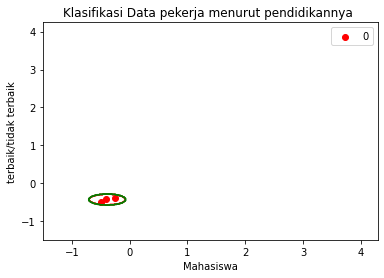

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


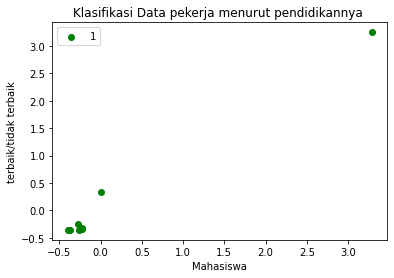

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contour(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i), label = j)
  plt.title('Klasifikasi Data pekerja menurut pendidikannya ')
  plt.xlabel('Mahasiswa')
  plt.ylabel('terbaik/tidak terbaik') 
  plt.legend()
  plt.show()